### Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("test(in).csv")
print(df.shape)

df.head(5)

(2191, 4)


,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


### Adding Emp_id column which is same as index

In [5]:
df = df.reset_index().rename(columns={'index' : 'emp_id'})

In [6]:
df.describe()

,emp_id
count,2191.000000
mean,1095.000000
std,632.631541
min,0.000000
25%,547.500000
50%,1095.000000
75%,1642.500000
max,2190.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emp_id   2191 non-null   int64 
 1   Subject  2191 non-null   object
 2   body     2191 non-null   object
 3   date     2191 non-null   object
 4   from     2191 non-null   object
dtypes: int64(1), object(4)
memory usage: 85.7+ KB


In [8]:
df.isna().sum()

emp_id     0
Subject    0
body       0
date       0
from       0
dtype: int64

#### There are no null values in our dataset

### Changing the datatype of date column from object to datetime

In [9]:
df.dtypes

emp_id      int64
Subject    object
body       object
date       object
from       object
dtype: object

In [10]:
df["date"] = pd.to_datetime(df["date"])

In [11]:
df.dtypes

emp_id              int64
Subject            object
body               object
date       datetime64[ns]
from               object
dtype: object

### Installing Natural Language Tool Kit (NLTK)

In [12]:
!pip install --user -U nltk

### Importing NLTK in to our notebook

1. Downloading vader_lexicon for sentiment analysis
2. Downloading punkt for tokenization
3. Downloading stopwords for text processing

In [13]:
import nltk

nltk.download("vader_lexicon")
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package vader_lexicon to C:\Users\Chatla
[nltk_data]     Manikanta\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Chatla
[nltk_data]     Manikanta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Chatla
[nltk_data]     Manikanta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Checking the SentimentIntensityAnalyzer with a single record in the dataset

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

examp = df.loc[40]["body"]
sia.polarity_scores(examp)

{'neg': 0.089, 'neu': 0.714, 'pos': 0.196, 'compound': 0.4215}

### Creating a new column "sentiment" based on the sentiment intensity of the body of each mail

In [15]:
df["sentiment"] = df["body"].apply(lambda x : "Positive" if sia.polarity_scores(x)["compound"] > 0.05 
                                  else "Negative" if sia.polarity_scores(x)["compound"] < -0.05
                                  else "Neutral")

In [16]:
sia.polarity_scores(df.loc[9]["body"])

{'neg': 0.011, 'neu': 0.989, 'pos': 0.0, 'compound': -0.1511}

### These features are quick predictors and give insight on variance and patterns.

In [17]:
df['body_len'] = df['body'].str.len()
df['word_count'] = df['body'].str.split().apply(len)

In [18]:
df.head()

,emp_id,Subject,body,date,from,sentiment,body_len,word_count
0,0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,Positive,692,101
1,1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,Positive,315,57
2,2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,Neutral,150,21
3,3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,Neutral,155,24
4,4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,Positive,197,42


### Visual representation of message_len and word_count

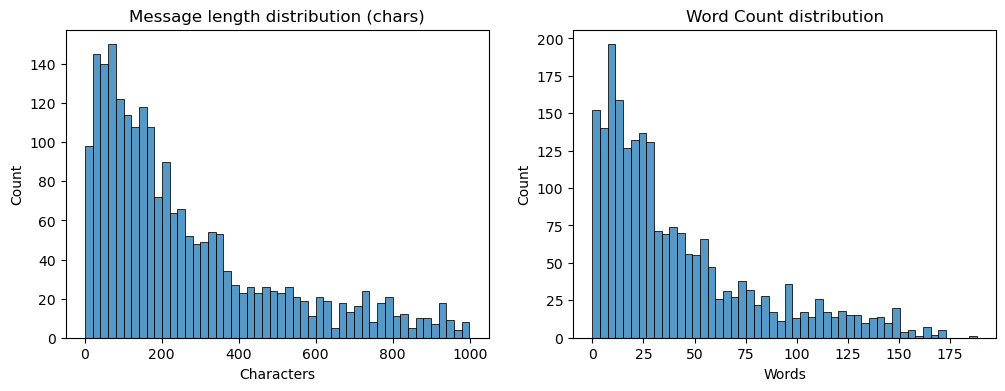

In [19]:
import seaborn as sb
features = ["body_len","word_count"]

plt.figure(figsize=(12,4))
for i,f in enumerate(features):
    plt.subplot(1,2,i+1)
    sb.histplot(data=df,x=f,bins=50)
    if f=="body_len":
        plt.title("Message length distribution (chars)")
        plt.xlabel("Characters")
    else:
        plt.title("Word Count distribution")
        plt.xlabel("Words")
plt.show()

#### From the above visualizations we can observe that
1. Most of the users send a message of 0-200 characters.
2. Most of the users send a message of 0-25 characters.

In [20]:
sent_counts = df["sentiment"].value_counts()
sent_counts

sentiment
Positive    1528
Neutral      511
Negative     152
Name: count, dtype: int64

### We plot sentiment distribution to know which sentiment is dominant

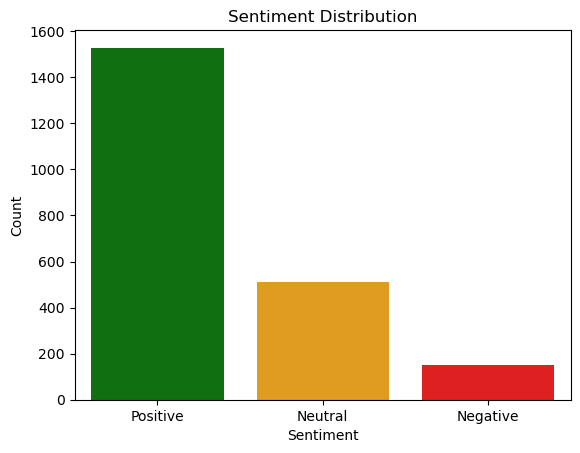

In [21]:
sb.barplot(x=sent_counts.index,y=sent_counts.values,palette = ["green","orange","red"],hue=sent_counts.index,legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

#### From the above visualization we can observe that => Most of the messages are in the positive tone.

### This distribution is helpful to analyze is sentiment improving, dropping, or stable over time.?

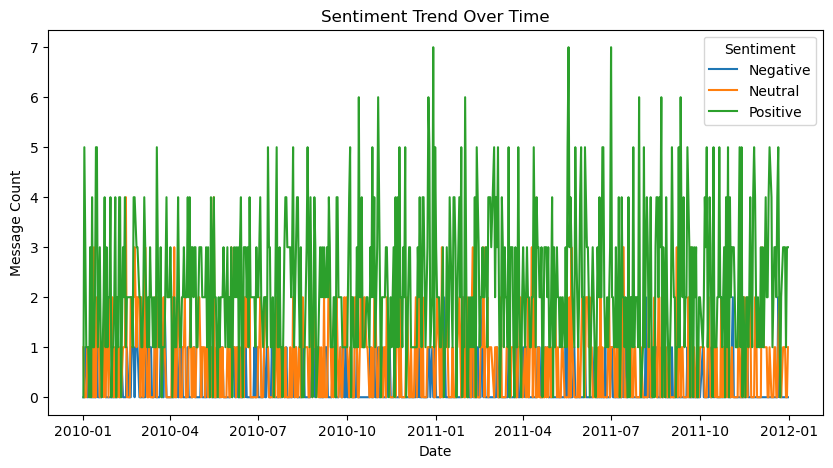

In [22]:
daily_sentiment = df.groupby([df['date'].dt.date, 'sentiment']).size().unstack(fill_value=0)

daily_sentiment.plot(figsize=(10,5))
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Message Count')
plt.legend(title='Sentiment')
plt.show()


#### We can observe that over the period of time there are no drop of positive messages or increasing of negative messages, it is constant over the time.

### Analyzing the dates with high negative messages

In [23]:
neg_trend = df[df['sentiment'] == 'Negative'].groupby(df['date'].dt.date).size()
threshold = neg_trend.mean() + 2 * neg_trend.std()
unusual_days = neg_trend[neg_trend > threshold]
print("\nDays with unusually high negative messages:\n", unusual_days)



Days with unusually high negative messages:
 date
2010-02-25    2
2010-03-26    2
2011-01-09    2
2011-01-29    2
2011-02-18    2
2011-07-20    2
2011-08-06    2
2011-11-04    2
2011-12-21    2
dtype: int64


### Mapping sentiment scores with respect to their sentiments

In [24]:
df["sentiment_score"] = df["sentiment"].apply(lambda x : 1 if x == "Positive"
                                             else -1 if x == "Negative"
                                             else 0)


In [25]:
df["month"] = df["date"].dt.to_period("M")
df.head()

,emp_id,Subject,body,date,from,sentiment,body_len,word_count,sentiment_score,month
0,0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,Positive,692,101,1,2010-05
1,1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,Positive,315,57,1,2010-07
2,2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,Neutral,150,21,0,2011-07
3,3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,Neutral,155,24,0,2010-03
4,4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,Positive,197,42,1,2011-05


### Aggregate scores on a monthly basis for each employee

In [26]:
monthly_scores = (
    df.groupby(["emp_id","month"])["sentiment_score"]
    .sum()
    .reset_index()
    .sort_values(["emp_id", "month"])
)
monthly_scores

,emp_id,month,sentiment_score
0,0,2010-05,1
1,1,2010-07,1
2,2,2011-07,0
3,3,2010-03,0
4,4,2011-05,1
...,...,...,...
2186,2186,2011-06,1
2187,2187,2011-01,1
2188,2188,2011-01,1
2189,2189,2011-03,1


### To ensure that there are no anomalies

In [27]:
print(monthly_scores.duplicated(subset=['emp_id','month']).sum())  

print(monthly_scores['sentiment_score'].describe())

0
count    2191.000000
mean        0.628024
std         0.610352
min        -1.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sentiment_score, dtype: float64


### Sorting monthly_scores first in descending order and then in alphabetical order.

In [28]:
monthly_scores_sorted = monthly_scores.sort_values(
    by=["month", "sentiment_score", "emp_id"],
    ascending=[True, False, True]  
)

In [29]:
monthly_scores_sorted

,emp_id,month,sentiment_score
116,116,2010-01,1
162,162,2010-01,1
211,211,2010-01,1
234,234,2010-01,1
276,276,2010-01,1
...,...,...,...
1985,1985,2011-12,0
2151,2151,2011-12,0
725,725,2011-12,-1
960,960,2011-12,-1


### Group by month and pick top 3 after sorting descending

In [30]:
top_positive = (
    monthly_scores_sorted.groupby("month")
    .head(3)
    .reset_index(drop=True)
)
top_positive

,emp_id,month,sentiment_score
0,116,2010-01,1
1,162,2010-01,1
2,211,2010-01,1
3,8,2010-02,1
4,10,2010-02,1
...,...,...,...
67,102,2011-11,1
68,145,2011-11,1
69,18,2011-12,1
70,70,2011-12,1


### Sort ascending to get lowest scores and Group by month and pick bottom 3

In [31]:

monthly_scores_sorted_neg = monthly_scores.sort_values(
    by=["month", "sentiment_score", "emp_id"],
    ascending=[True, True, True]
)

top_negative = (
    monthly_scores_sorted_neg.groupby("month")
    .head(3)
    .reset_index(drop=True)
)

top_negative

,emp_id,month,sentiment_score
0,80,2010-01,-1
1,1136,2010-01,-1
2,1324,2010-01,-1
3,9,2010-02,-1
4,754,2010-02,-1
...,...,...,...
67,538,2011-11,-1
68,1297,2011-11,-1
69,725,2011-12,-1
70,960,2011-12,-1


### Ensuring that each month have top 3 employees from both positive and negative sentiments

In [32]:
print(top_positive['month'].value_counts().sort_index())
print(top_negative['month'].value_counts().sort_index())

month
2010-01    3
2010-02    3
2010-03    3
2010-04    3
2010-05    3
2010-06    3
2010-07    3
2010-08    3
2010-09    3
2010-10    3
2010-11    3
2010-12    3
2011-01    3
2011-02    3
2011-03    3
2011-04    3
2011-05    3
2011-06    3
2011-07    3
2011-08    3
2011-09    3
2011-10    3
2011-11    3
2011-12    3
Freq: M, Name: count, dtype: int64
month
2010-01    3
2010-02    3
2010-03    3
2010-04    3
2010-05    3
2010-06    3
2010-07    3
2010-08    3
2010-09    3
2010-10    3
2010-11    3
2010-12    3
2011-01    3
2011-02    3
2011-03    3
2011-04    3
2011-05    3
2011-06    3
2011-07    3
2011-08    3
2011-09    3
2011-10    3
2011-11    3
2011-12    3
Freq: M, Name: count, dtype: int64


### Storing the top 3 positive and negative employees for each month in a csv file format

In [48]:
top_positive.to_csv("outputs/top_positive_employees.csv",index=False)
top_negative.to_csv("outputs/top_negative_employees.csv",index=False)

## Filght Risks

In [34]:
neg_df = df[df["sentiment"] == "Negative"].copy()
neg_df = neg_df.sort_values(ascending = True, by=["emp_id","date"])
neg_df

,emp_id,Subject,body,date,from,sentiment,body_len,word_count,sentiment_score,month
9,9,More Dallas ASE Information,The start time for Tuesday morning has been ch...,2010-02-06,kayne.coulter@enron.com,Negative,857,150,-1,2010-02
13,13,Re: trades,kiss my ass now bitch!\n\n\n \n\n\nFrom: Br...,2010-09-24,don.baughman@enron.com,Negative,167,11,-1,2010-09
17,17,RE: Southern Union Galveston/Pt. Arthur,She's probably fucking wrong!\n,2010-07-07,sally.beck@enron.com,Negative,30,4,-1,2010-07
26,26,FW: Tahoe,I forgot to mention that if you do not buy the...,2010-11-06,don.baughman@enron.com,Negative,189,36,-1,2010-11
42,42,Re: GAME WEDNEDSDAY @ 7:00,"now, now - you didn't look that great against ...",2011-08-15,sally.beck@enron.com,Negative,140,26,-1,2011-08
...,...,...,...,...,...,...,...,...,...,...
2132,2132,Re: FW: Truth in 13 words,Exactly! Mom sent me the pictures from the ho...,2010-12-12,don.baughman@enron.com,Negative,268,41,-1,2010-12
2163,2163,Re:,"Frank,\n\nThe implied risk created by the san ...",2010-07-15,bobette.riner@ipgdirect.com,Negative,396,72,-1,2010-07
2169,2169,League Dues,I have some good news and some bad news. The ...,2010-06-18,john.arnold@enron.com,Negative,283,58,-1,2010-06
2182,2182,Re: The Next HEISMAN winner for the University...,he hates the farmers down at the pulse machine...,2010-04-26,lydia.delgado@enron.com,Negative,153,18,-1,2010-04


### Counting how many negative messages each employee sent within any 30-day span

In [36]:
flight_risk_list = []

for emp, group in neg_df.groupby("emp_id"):
    group = group.sort_values("date")
    for i in range(len(group)):
        start_date = group.iloc[i]["date"] - pd.Timedelta(days=30)
        window_count = group[(group["date"] >= start_date) & (group["date"] <= group.iloc[i]["date"])].shape[0]
        if window_count >= 4:
            flight_risk_list.append(emp)
            break  


In [37]:
flight_risk_employees = pd.DataFrame({"emp_id": sorted(set(flight_risk_list))})
print("Employees identified as flight risks:\n")
print(flight_risk_employees)

Employees identified as flight risks:

Empty DataFrame
Columns: [emp_id]
Index: []


### Conclusion: 
1. Upon analyzing the dataset, it was observed that each employee ID appears only once, meaning each employee has sent at most one message.
2. Since a flight risk requires four or more negative messages within a 30-day period, no employee met this condition.
3. Therefore, no employees were identified as flight risks for this dataset.

### Creating aggregated dataset

In [38]:
model_df = (
    df.groupby(["emp_id", df["date"].dt.to_period("M")])
    .agg(
        msg_count=("body", "count"),
        avg_word_count=("body", lambda x: x.str.split().apply(len).mean()),
        avg_msg_length=("body", lambda x: x.str.len().mean()),
        sentiment_score=("sentiment_score", "sum")
    )
    .reset_index()
)


In [39]:
model_df.head()

,emp_id,date,msg_count,avg_word_count,avg_msg_length,sentiment_score
0,0,2010-05,1,101.0,692.0,1
1,1,2010-07,1,57.0,315.0,1
2,2,2011-07,1,21.0,150.0,0
3,3,2010-03,1,24.0,155.0,0
4,4,2011-05,1,42.0,197.0,1


### Split the aggregated dataset based on independent variables(features) and dependent variables(target)

In [40]:
X = model_df[["msg_count","avg_word_count","avg_msg_length"]]
y = model_df["sentiment_score"]

### Spliting X and y into train data and test data
1. Importing train_test_split to divide X and y into given proportion for train data and test data.
2. Importing LinearRegression model from sklearn.linear_model.

In [41]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Train linear regression model with train data 

In [42]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Evaluating model performance

In [43]:
from sklearn.metrics import mean_squared_error,r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error : {mse:.2f}")
print(f"R2 Score : {r2:.2f}")

Model Evaluation Metrics:
Mean Squared Error : 0.42
R2 Score : 0.04


1. R2 Score tells how well the model explains the sentiment variation.
2. Mean Squared Error tells how far predictions are far from actual values.

### Visual representation of model performance metrics

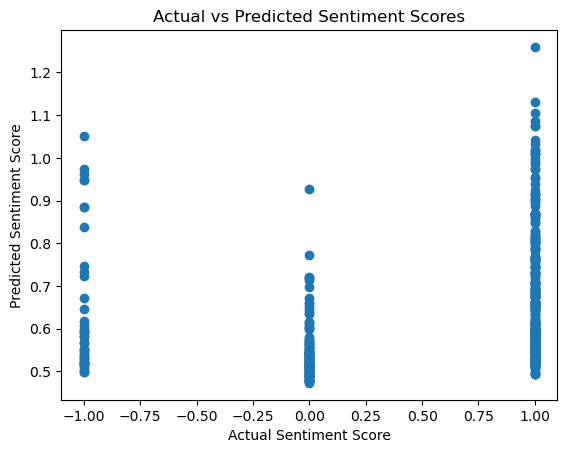

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sentiment Score")
plt.ylabel("Predicted Sentiment Score")
plt.title("Actual vs Predicted Sentiment Scores")
plt.show()


In [45]:
model.coef_,model.intercept_

(array([ 0.        ,  0.00574753, -0.0003278 ]), 0.4902390187310419)

In [46]:
feature_coeff = pd.DataFrame({
    "Feature" : X.columns,
    "Coefficients" : model.coef_.round(3)
})
feature_coeff

,Feature,Coefficients
0,msg_count,0.000
1,avg_word_count,0.006
2,avg_msg_length,-0.000


### Conclusion
1. msg_count = 0.000, that means msg_count have no meaningful impact on sentiment scores.
2. avg_word_count = 0.006, a small positive relationship => employees whose messages contain more words tend to have slightly higher sentiment scores.
3. avg_msg_length = -0.000, which means avg_msg_length have practically no effect on sentiment scores.

#### Storing model coefficients in a CSV format

In [47]:
feature_coeff.to_csv("outputs/model_coefficients.csv", index=False)